### Non-ideal reaction-diffusion systems

In the last notebook you learned the basics of phase separation driven by the competition between entropy (favoring mixing) and non-ideal interactions (favoring demixing). In this notebook you will see how first order reactions can introduce patterns of a certain length scale.

In [1]:
''' Import the packages that we need for this tutorial '''
import sys
import numpy as np
import matplotlib.pyplot as plt

import pde

We build upon the last notebook, where the concentration field $c(x,y,t)$ describes the state of the system. But now the dynamics are not given by diffusion only, instead the particles can react as well and we introduce a reactive flux $s$ that describes how many $A$ particles are created $s>0$ or destroyed $s<0$ per unit time. In this case the full dynamics are given by

\begin{align}
    \partial_t c(x,y,t) = M\nabla^2 \mu (x,y,t) + s(x,y,t)
\end{align}

where we assume a constant diffusive mobility $M$.

We assume a simple switch between the two particle types $A\rightleftharpoons B$, where $A\rightarrow B$ proceeds with rate $k_f$ and $B\rightarrow A$ with rate $k_b$. The total change of $A$ particles is then given by $s=-k_fc_A + k_bc_B=-k_fc+k_b(1-c)$, using $c_A=c$ and $c_B=1-c_A$. 

### Reactions in a homogeneous mixture

We neglect diffusion for now and discuss the reactive flux $s$ only.

### Problem 1

For constant $k_f$ and $k_b$, calculate the concentration $c_0$ for which $s(c)=-k_f c+k_b(1-c)$ vanishes. Afterwards plot $s(c)$ for $k_f=1$ and $k_b=0.3k_f$. For a given $c(t=0)$ and use it to explain the dynamics $\partial_t c = -k_f c + k_b(1-c)$.<br>
Then determine the slope $-k$ in terms of $k_f$ and $k_b$ and express $s(c)$ in terms of $k$ and $c_0$.

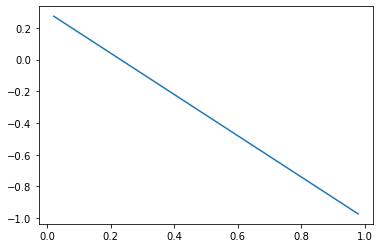

In [2]:
kf = 1
kb = 0.3*kf
c = np.linspace(0, 1)[1:-1]

plt.plot(c,-kf*c+kb*(1-c))

### Solution 1

For $c>c_0$ $s<0$ so $A$ gets destroyed until $c=c_0$, while $A$ is created for $c<c_0$, so $c_0$ is a stable fixpoint.<br>
The slope is $k=k_f+k_b$ and the flux vanishes for $c_0=k_b/(k_f+k_b)$, so $s(c) = -k(c-c_0)$.

### Combining non-ideal diffusion and reaction

We use the free energy density from the last tutorial

\begin{align}
    F = a V \phi^2 ( 1- \phi^2)
\end{align}

which is plotted below for $a=1$.

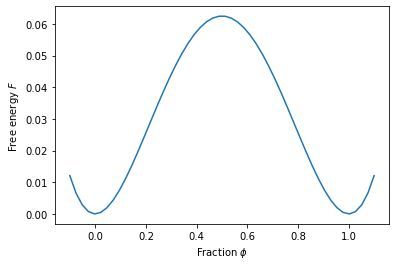

In [3]:
c = np.linspace(-0.1, 1.1)
plt.plot(c, c**2 * (1 - c)**2)
plt.xlabel('Fraction $\phi$')
plt.ylabel(r'Free energy $F$');

### Problem 2

First adjust the right hand side of `pde.PDE` to include chemical reactions $s(c)=-k(c-c_0)$.<br>
Then run the simulation for $k=5\cdot10^{-3}$ and $c_0=0.1$. How does the average concentration develop over time? Why is it different from the case without reactions?

Afterwards find a function that describes the average concentratoin over time $\bar{c}(t)$ in terms of the initial average concentration $\bar{c}(t=0)$ and the reaction parameters $k$ and $c_0$.

In [4]:
# define the partial differential equation
k = 5.e-3
c0 = 0.1

eq = pde.PDE({'c': 'laplace(2 * c * (1 - c) * (1 - 2*c) - laplace(c))'})

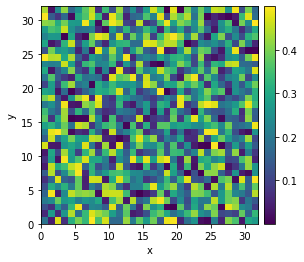

  0%|          | 0/1000.0 [00:00<?, ?it/s]

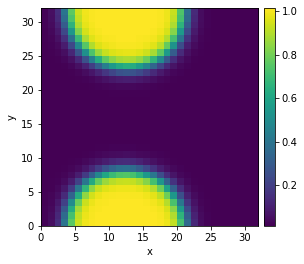

In [5]:
# prepare a random initial state
grid = pde.UnitGrid([32, 32], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=0.5)
initial_state.plot();

# simulate the dynamics
storage = pde.MemoryStorage()
final_state = eq.solve(initial_state, t_range=1000, dt=1.e-3, tracker=['progress', storage.tracker(10)])
final_state.plot();

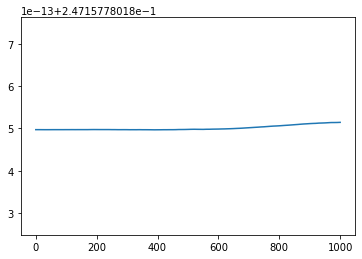

In [6]:
avs = np.zeros(len(storage.data))
for i in range(len(storage.data)):
    avs[i] = np.average(storage.data[i])
ts = np.asarray(storage.times)

plt.plot(ts,avs)
plt.show()
plt.close()

### Solution

The average concentration decays exponetially towards $c_0$. Mass is not conserved anymore, because the stable fixpoint for the reaction is $c_0$ independent of the initial average concentration.
The average concentration can be described by $\bar{c}(t)=c_0+(\bar{c}(t=0)-c_0)\exp(-kt)$

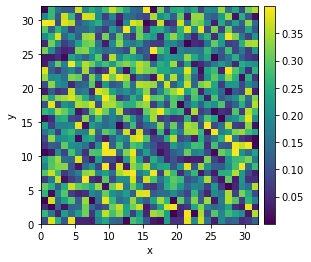

  0%|          | 0/1000.0 [00:00<?, ?it/s]

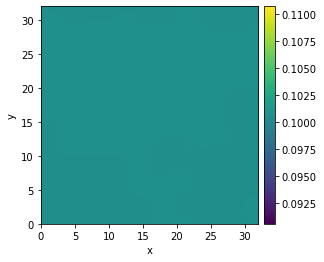

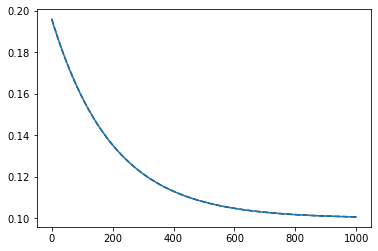

In [7]:
eq2 = pde.PDE({'c': f'laplace(2 * c * (1 - c) * (1 - 2*c) - 2*laplace(c)) - {k} * (c - {c0})'})
eq2.expressions

# prepare a random initial state
grid = pde.UnitGrid([32, 32], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=0.4)
initial_state.plot();

# simulate the dynamics
storage = pde.MemoryStorage()
final_state = eq2.solve(initial_state, t_range=1000, dt=1.e-3, tracker=['progress', storage.tracker(10)])
final_state.plot();

avs = np.zeros(len(storage.data))
for i in range(len(storage.data)):
    avs[i] = np.average(storage.data[i])
ts = np.asarray(storage.times)
plt.plot(ts,c0+(avs[0]-c0)*np.exp(-k*ts),ls='--',color='k')
plt.plot(ts,avs)
plt.show()
plt.close()

### Droplets with chemical reactions

For the initial condition and $c_0$ above the system ends up in a homogeneous state with $c(x,y)=c_0$ everywhere. But It is possible to form droplets with chemical reactions as well. For example increasing $c_0$ and the initial average concentration leads to the formation of a droplet.

In [29]:
# define the partial differential equation
k = 5.e-3
c0 = 0.25

eq2 = pde.PDE({'c': f'2*laplace(c * (1 - c) * (1 - 2*c) - laplace(c)) - {k} * (c - {c0})'})
eq2.expressions

{'c': '-0.005*c + 2.0*laplace(c*(c - 1)*(2*c - 1) - laplace(c)) + 0.00125'}

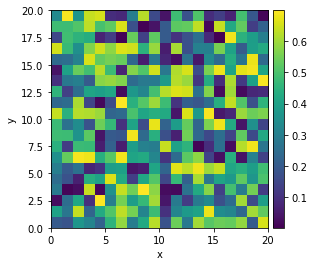

  0%|          | 0/3000.0 [00:00<?, ?it/s]

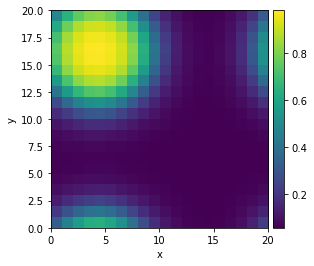

In [25]:
# prepare a random initial state
grid = pde.UnitGrid([20, 20], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=.7)
initial_state.plot();

# simulate the dynamics
storage = pde.MemoryStorage()
final_state = eq2.solve(initial_state, t_range=3000, dt=1.e-2, tracker=['progress', storage.tracker(10)])
final_state.plot();

### Problem 3
Plot the time evolution of the average concentration, is it qualitatively different from the homogeneous case?<br>
Looking at the final state, how would the reaction rate inside and outside the droplet look like?<br>
Using `pde.ScalarField(grid,data=?)` function, plot the reaction rate corresponding to the final state of your simulation.

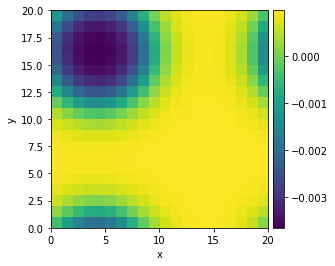

In [26]:
react = pde.ScalarField(grid, data=-k*(final_state.data-c0))
react.plot()

### Solution 3
It is qualitatively the same as in the homogeneous case, a exponential decay to $c_0$.<br>
The reaction is strongly negative inside the droplet and positive or zero outside.

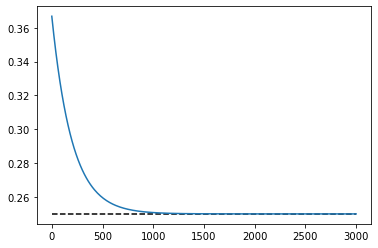

In [28]:
avs = np.zeros(len(storage.data))
for i in range(len(storage.data)):
    avs[i] = np.average(storage.data[i])
ts = np.asarray(storage.times)
plt.plot([0,ts[-1]],[c0,c0],color='k',ls='--')
plt.plot(ts,avs)
plt.show()
plt.close()

### Multiple stable droplets
In the last tutorial you have learned that droplets without reactions minimize the free energy by minimizing the total area and that Ostwald ripening leads to the formation of one large droplet. With chemical reactions it is possible to stabilize multiple droplets at the same time.

### Problem 4
In the above example you find only one droplet, what could be missing to see multiple stable droplets?<br>
Looking again at the dynamical equation

\begin{align}
    \partial_t c = a\cdot M\nabla^2[c(1-c)(1-2c) + \nabla^2c] - k(c-c_0),
\end{align}

where $a\cdot M=D=2$ and $k=5\cdot10^{-3}$, what are the units of $D$ and $k$?<br>
Using diffusivity $D$ and reaction rate $k$, built a length scale.<br>
How big is this length scale, the reaction diffusion length $\ell$, compared to system size?<br>
Simulate the system for a square with side length $5\ell$ and describe in what you observe.

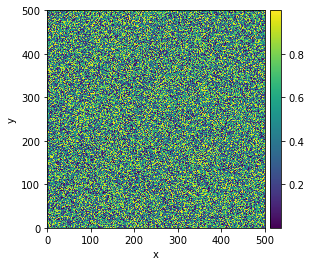

  0%|          | 0/5000.0 [00:00<?, ?it/s]

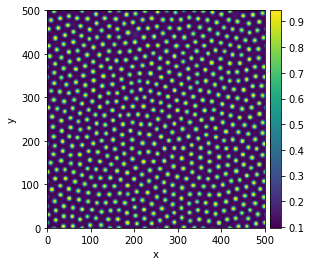

In [103]:
# prepare a random initial state
grid = pde.UnitGrid([100, 100], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=1.)
initial_state.plot();

# simulate the dynamics
storage = pde.MemoryStorage()
final_state = eq2.solve(initial_state, t_range=5000, dt=1.e-2, tracker=['progress', storage.tracker(10)])
final_state.plot();

### Solution 4
Units of $D$ are $L^2/T$ and units of $k$ are $1/T$. The length scale is $\ell=\sqrt{D/k}=20$, system size is $L=20$ so its $L~1\ell$. For $L=5\ell$ we see multiple droplets of simiilar size with similar spacing.

### Problem 5

In what pattern do the droplets arrange and why?<br>
Not all droplets attain exactly the same size for this simulation time, would they end up at the same size if you simulate infinitely long?

### Solution 5

They arrange in a hexagonal pattern, because it is the closed packing solution in 2D. As a hexagonal pattern does not fit into a quadratic box it is possible that the steady state contains defects and not all droplets attain exactly the same time even for infinite simulation time.

### Droplet size depends on length scale $\ell$

Using the interface width between droplet and dilute phase $w=\sqrt{\kappa/a}$ (here $w=1$) as one length scale and introducing a time scale $\tau = w^2/D$, we can rewrite the dynamical equation in dimensionless form as

\begin{align}
    \partial_t c = \nabla^2 [c(1-c)(1-2c) + \nabla^2c] - \frac{w^2}{\ell^2}(c-c_0)
\end{align}

where the ratio between interface width and reaction diffusion length $w^2/\ell^2$ is the only parameter left.

### Problem 6

Before simulating the system for different $\ell$ by varying $k$, how do you expect droplet size and distance to change when $\ell$ is increased/decreased?

Simulate the system for $k=2\cdot 10^{-2}$ and $k=5\cdot 10^{-2}$ and check how the droplet radius and the pattern change.

In [130]:
# define the partial differential equation
k = 2.e-2
D = 2
c0 = 0.25
w=1
ell = np.sqrt(D/k)
ellsq = D/k

eq2 = pde.PDE({'c': f'laplace(c * (1 - c) * (1 - 2*c) - laplace(c)) - {w}*{w}/{ellsq} * (c - {c0})'})
eq2.expressions

{'c': '-0.01*c + laplace(c*(c - 1)*(2*c - 1) - laplace(c)) + 0.0025'}

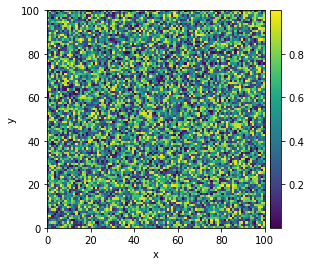

  0%|          | 0/5000.0 [00:00<?, ?it/s]

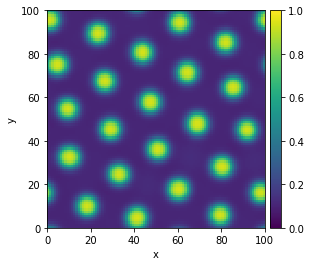

In [141]:
# prepare a random initial state
grid = pde.UnitGrid([100, 100], periodic=True)
initial_state = pde.ScalarField.random_uniform(grid, vmin=0, vmax=1.)
initial_state.plot();

# simulate the dynamics
storage = pde.MemoryStorage()
final_state = eq2.solve(initial_state, t_range=5000, dt=1.e-2, tracker=['progress', storage.tracker(10)])
final_state.plot(vmin = 0, vmax = 1);

### Solution 6

Increasing $\ell$ (decreasing $k$) leads to larger droplets and decreasing $\ell$ (increasing $k$) leads to smaller droplets.

The lattice looks more hexagonal for $k=2\cdot10^{-2}$.

### Analyzing the results



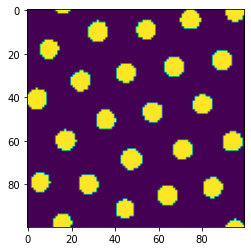

In [142]:
binary = np.where(final_state.data>0.5,1,0)

from scipy.ndimage import measurements
lw, num = measurements.label(binary)
plt.imshow(binary)

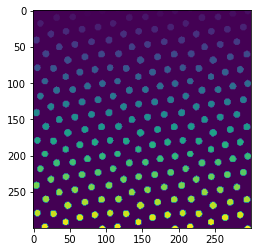

In [143]:
offset = np.array([dim if p else 0 for p, dim in zip(grid.periodic, grid.shape)])
pad = np.c_[offset, offset].astype(np.intc)
mask_padded = np.pad(binary, pad, mode="wrap")
assert np.all(mask_padded.shape == np.array(grid.shape) + 2 * offset)

# locate individual clusters in the padded image
labels, num_labels = measurements.label(mask_padded)

indices = range(1, num_labels + 1)

volumes = measurements.sum(mask_padded, labels, index=indices)
radii = 3*volumes**(1/3)/4/np.pi

plt.imshow(labels)

65.28169014084507 9.740554252373112
0.9572148148993588 0.06599934636300472


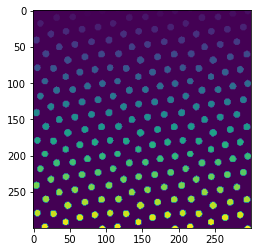

In [144]:
print(np.mean(volumes),np.std(volumes))
print(np.mean(radii),np.std(radii))
#plt.hist(volumes)
plt.imshow(labels)

positions = measurements.center_of_mass(mask_padded, labels, index=indices)
# correct for the additional padding of the array
positions = grid.cell_to_point(positions)
xpos, ypos = positions[:,0], positions[:,1]

In [145]:
''' The code for the pair Correlation Function in 2D is from
https://github.com/cfinch/Shocksolution_Examples/blob/master/PairCorrelation/paircorrelation.py '''

def pairCorrelationFunction_2D(x, y, S, rMax, dr):
    """Compute the two-dimensional pair correlation function, also known
    as the radial distribution function, for a set of circular particles
    contained in a square region of a plane.  This simple function finds
    reference particles such that a circle of radius rMax drawn around the
    particle will fit entirely within the square, eliminating the need to
    compensate for edge effects.  If no such particles exist, an error is
    returned. Try a smaller rMax...or write some code to handle edge effects! ;)
    Arguments:
        x               an array of x positions of centers of particles
        y               an array of y positions of centers of particles
        S               length of each side of the square region of the plane
        rMax            outer diameter of largest annulus
        dr              increment for increasing radius of annulus
    Returns a tuple: (g, radii, interior_indices)
        g(r)            a numpy array containing the correlation function g(r)
        radii           a numpy array containing the radii of the
                        annuli used to compute g(r)
        reference_indices   indices of reference particles
    """
    from numpy import zeros, sqrt, where, pi, mean, arange, histogram
    # Number of particles in ring/area of ring/number of reference particles/number density
    # area of ring = pi*(r_outer**2 - r_inner**2)

    # Find particles which are close enough to the box center that a circle of radius
    # rMax will not cross any edge of the box
    bools1 = x > rMax
    bools2 = x < (S - rMax)
    bools3 = y > rMax
    bools4 = y < (S - rMax)
    interior_indices, = where(bools1 * bools2 * bools3 * bools4)
    num_interior_particles = len(interior_indices)

    if num_interior_particles < 1:
        raise  RuntimeError ("No particles found for which a circle of radius rMax\
                will lie entirely within a square of side length S.  Decrease rMax\
                or increase the size of the square.")

    edges = arange(0., rMax + 1.1 * dr, dr)
    num_increments = len(edges) - 1
    g = zeros([num_interior_particles, num_increments])
    radii = zeros(num_increments)
    numberDensity = len(x) / S**2

    # Compute pairwise correlation for each interior particle
    for p in range(num_interior_particles):
        index2 = interior_indices[p]
        d = sqrt((x[index2] - x)**2 + (y[index2] - y)**2)
        d[index2] = 2 * rMax

        (result, bins) = histogram(d, bins=edges, normed=False)
        g[p, :] = result/numberDensity

    # Average g(r) for all interior particles and compute radii
    g_average = zeros(num_increments)
    for i in range(num_increments):
        radii[i] = (edges[i] + edges[i+1]) / 2.
        rOuter = edges[i + 1]
        rInner = edges[i]
        g_average[i] = mean(g[:, i]) / (pi * (rOuter**2 - rInner**2))

    return (g_average, radii, interior_indices)

In [146]:
rdf = pairCorrelationFunction_2D(xpos, ypos, 1500, 200, 3)

/var/folders/dy/9_2jrg4s4zj7m6c8z14d5ntw0000gn/T/ipykernel_50313/2514928550.py:54: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  (result, bins) = histogram(d, bins=edges, normed=False)


(0.0, 100.0, 0.0, 40.0)

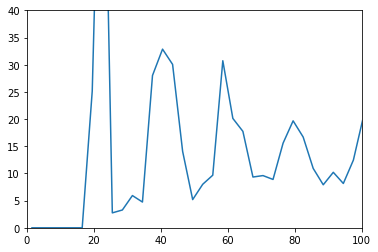

In [148]:
plt.plot(rdf[1],rdf[0])
plt.axis([0,100,0,40])

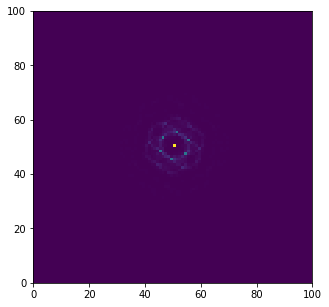

In [150]:
from scipy.fftpack import fft2, fftfreq, fftshift
f1 = np.abs(fftshift(fft2(final_state.data)))
f2 = fft2(final_state.data)
kx, ky = fftfreq(100,1), fftfreq(100,1)
x,y = np.meshgrid(kx,ky)
plt.figure(figsize=(5,5))
plt.pcolormesh(f1,vmin=0,vmax=2000)
plt.axis([200,300,200,300])

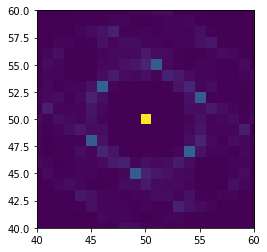

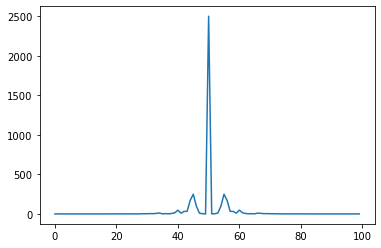

In [153]:
plt.imshow(f1)
plt.axis([40,60,40,60])
plt.show()
plt.close()
plt.plot(f1[:,50])
#plt.axis([250,300,0,2000])

  0%|          | 0/501 [00:00<?, ?it/s]

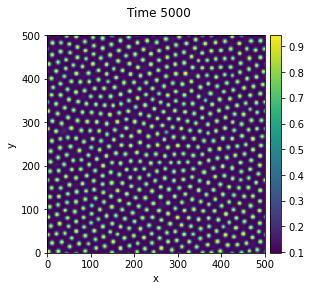

In [140]:
pde.movie(storage, 'hexagonal_pattern.mp4', progress=True)